In [1]:
# Note: make sure to install tesseract before running the below scripts via "sudo apt install tesseract-ocr"
# Importing libs
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
import cv2

In [2]:
# Declaring the function to extract text from file 
def extract_text_from_image_file(file_n):
    return pytesseract.image_to_string(Image.open(file_n))

# Declaring the function to extract bounding boxes from file 
def extract_data_from_image_file(file_n):
    return pytesseract.image_to_data(Image.open(file_n), output_type='dict')

Introduction

Tesseract is an open source text recognition (OCR) Engine, available under the Apache 2.0 license
Itcan be used directly, or (for programmers) using an API to extract printed text from images. It
supports a wide variety of languages.

Tesseract doesn't have a builtin GUI, but there are several available from the 3rdParty page.

Installation

There are two parts to install, the engine itself, and the training data for a language.
['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text']


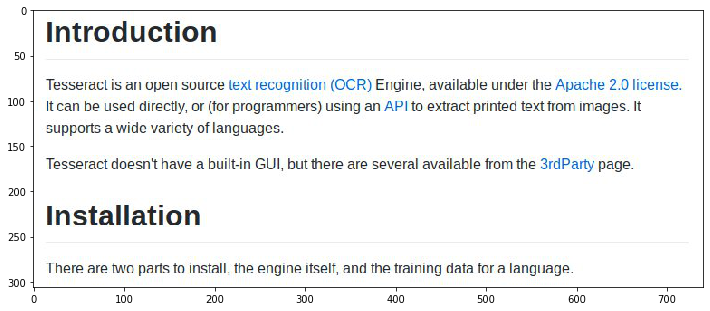

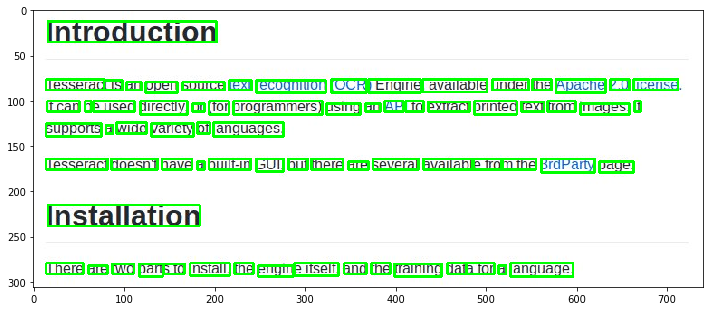

In [3]:
# Extracting text from a high quality screenshot
filename = './data/screenshot.jpg'
plt.figure(figsize=(12,8))
plt.imshow(Image.open(filename))
print(extract_text_from_image_file(filename))

# Extract data
data = extract_data_from_image_file(filename)
print(list(data.keys()))  # Printing the data keys available

# Now let's highlight the words detected by OCR on the image (we skip batch image processing here)
img = cv2.imread(filename)
plt.figure(figsize=(12,8))
for i in range(len(data['level'])):
    if data['text'][i] == '':  # Skipping empty strings
        continue
    cv2.rectangle(img, (data['left'][i], data['top'][i]), 
                  (data['left'][i]+data['width'][i], data['top'][i]+data['height'][i]), (0, 255, 0), 2)
plt.imshow(img[:, :, ::-1])
plt.show()

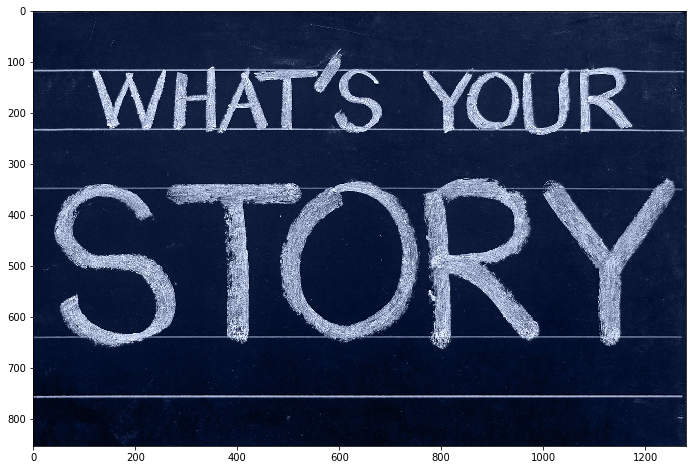

In [4]:
# Extracting text from a blackboard photo
filename = './data/chalkboard-620316_1280.jpg'
plt.figure(figsize=(12,8))
plt.imshow(Image.open(filename))
print(extract_text_from_image_file(filename))


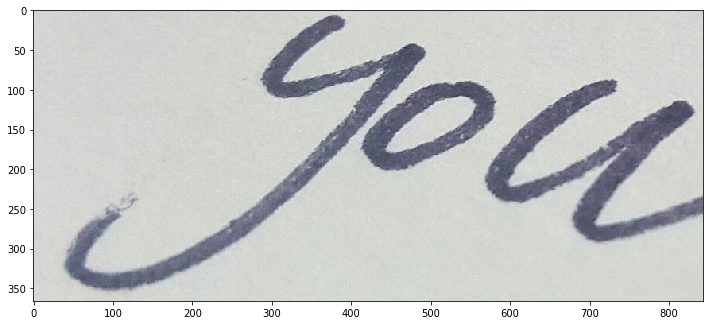

In [5]:
# Extracting text from a handwritten scan with a decent skew
filename = './data/handwritten_you.jpg'
plt.figure(figsize=(12,8))
plt.imshow(Image.open(filename))
print(extract_text_from_image_file(filename))

